
# Análise dos Dados do Airbnb - New York City

Certamente você ja ouviu falar sobre o [**Airbnb**](https://www.airbnb.com.br/), ou já tenha inclusive utilizado o serviço prestado pela plataforma. E este sucesso todo não é à toa: unir o útil (pessoas que precisam de hospedagem) ao agradável (pessoas que tem disponibilidade para alugar um imóvel/quarto) de forma descomplicada tem sido uma das características mais apreciadas pelos usuários. E os números da startup criada em 2008 apenas reforçam essa tendência: **mais de 300 milhões de pessoas hospedadas em 10 anos de operação**.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos e correlação entre eles.** 

Nova Iorque, além de ser berço de milhares de startups e também ser conhecida centro financeiro, tem se tornado um dos principais destinos de turistas que visitam os Estados Unidos. De 2010 a 2016, o número de pessoas que visitam a cidade para fins de turismo saltou de 9,7 milhões para 12,7 milhões ao ano. (Fonte: [Exame](https://exame.abril.com.br/revista-exame/a-cidade-que-nasceu-global/) )

## Obtenção dos Dados


A análise presente neste artigo explorou dados retirados exclusivamente do banco de dados fornecido pelo próprio Airbnb, através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

De modo que vamos analisar alguns dados básicos referentes à cidade de Nova Iorque, utilizaremos o pacote de dados abaixo:
* **'listings.csv'** - *Summary information and metrics for listings in New York City (good for visualisations) 

In [0]:
# Importar os pacotes necessários para o projeto:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# Em seguida, devemos importar o pacote com os dados que serão explorados:
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/visualisations/listings.csv")

## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

### Qual volume de dados que estamos analisando? 
Para determinarmos uma direção para nossa análise, precisamos saber qual o volumes de dados que temos à disposição. Através do comando abaixo é sabido que temos **50599 linhas** e **16 colunas** contendo informações. 


In [0]:
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}".format(df.shape[1]))

Variáveis:	 50599
Entradas:	 16


Já sabemos que teremos 16 itens de 50599 linhas para análise mas, quais são essas 16 variáveis? 

Através do comando abaixo, conseguimos listar o tipo de informação que é fornecida para cada variável:

In [0]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Agora que já temos uma legenda para as entradas, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas:

In [0]:
# Mostrar as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É possível que hajam variáveis que não estão contempladas nos dados, e é importante sabermos isso a fim de desconsiderarmos as mesmas quando iniciarmos as análises. 

In [0]:
#Analisando as 5 primeiras entradas, conforme o comando abaixo, podemos ver que não temos campos vazios até o momento:

df.isnull().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# A dúvida é: será que essa é a realidade das 809584 células? 
# Vamos analisar o número de células vazias por colunas:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

reviews_per_month                 20.198028
last_review                       20.198028
host_name                          1.112670
name                               0.033598
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Vemos que as colunas "reviews_per_month" e "last_review" possuem aproximadamente 20% das suas entradas sem informações.

### **Q3. Qual o tipo de distribuição das variáveis?** 

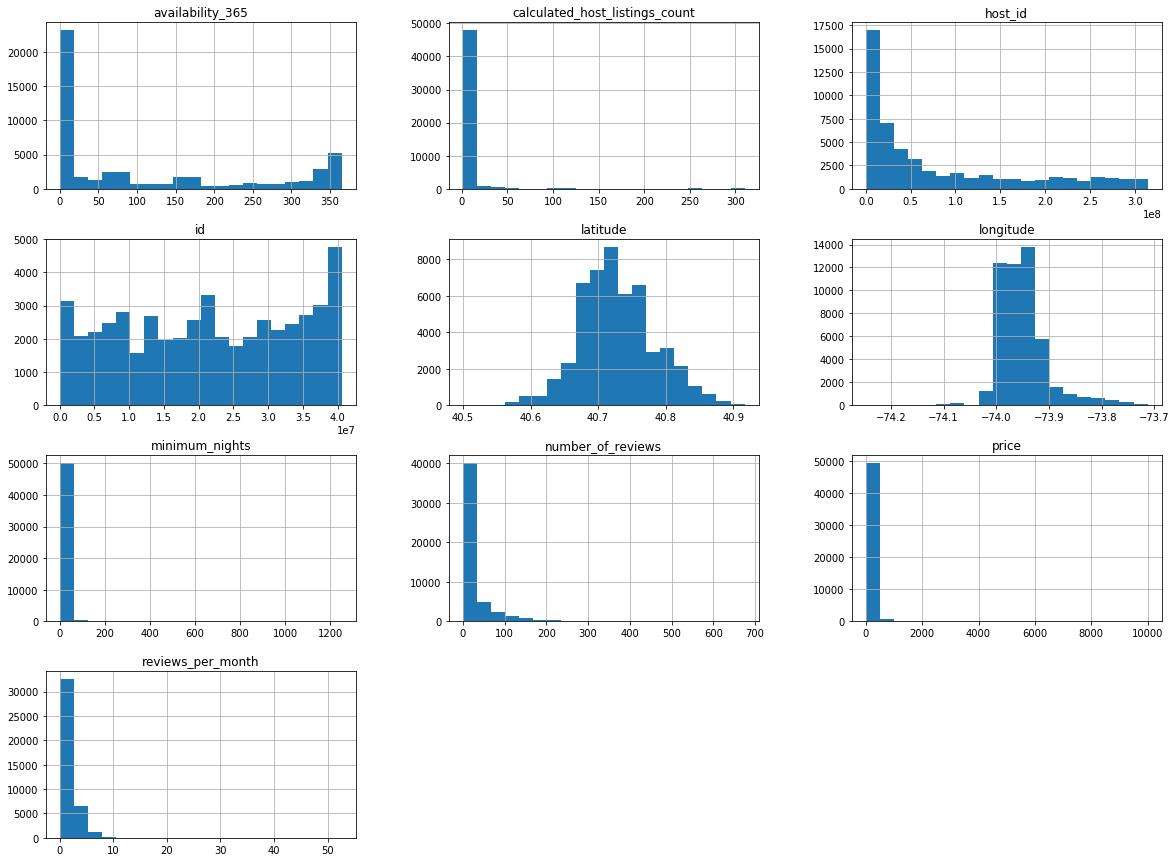

In [0]:
# A fim de analisarmos como as variáveis estão distribuídas, vamos plotar o histograma das mesmas conforme abaixo:
df.hist(bins=20, figsize=(20,15));

# Q4. Outliers

Os outliers são dados que distorcem a análise e podem ser reconhecidos inicialmente nos histogramas que plotamos acima. Por exemplo: '*minimum_nights*'. Ao olhar o gráfico, ele não nos diz muita coisa em função dos valores contemplados no eixo X.


Temos outras formas de verificar outliers, são elas:

*   Resumo estatístico por meio do método *describe()*
*   Plotar boxplots para a variável.




In [0]:
# Resumo estatístico:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50599.000000,50599.000000,50599.000000,40379.000000,50599.000000,50599.000000
mean,158.171782,7.531908,24.809225,1.405862,7.330916,112.785944
std,348.089562,22.454271,47.317882,1.695551,32.757485,135.891028
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,105.000000,3.000000,6.000000,0.740000,1.000000,42.000000
75%,175.000000,5.000000,25.000000,2.110000,2.000000,225.000000
max,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000


Com os dados acima podemos concluir inicialmente que:


*  O preço médio das acomodações é de USD158.17, o preço máximo é USD10,000.00, e que 75% das acomodações custam até USD175.00, logo, esse "max" está contribuindo na distorção do valor apresentado no histograma; 
*   O mínimo de noites em média é de 7.53, porém o máximo é de 1250 noites, claramente nosso histograma será distorcido com esse outlier.

Vamos explorar um pouco mais esses dados através de boxslopts individuais para cada um:

price: valores acima de USD2000
113 entradas
0.2233%


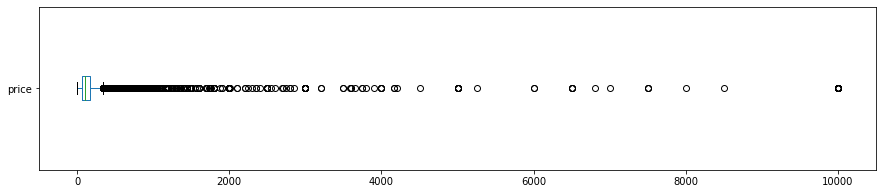

In [0]:
# Bloxplot "Price":
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show

# Ver quantidade de entradas cujo valores estão acima de USD2,000:
print("price: valores acima de USD2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

Podemos ver que a grande maioria dos preços das diárias é de até USD2,000, e que valores que fogem disso, representam apenas 0.2233% de todas as entradas.

minimum_nights: valores acima de 30
938 entradas
1.8538%


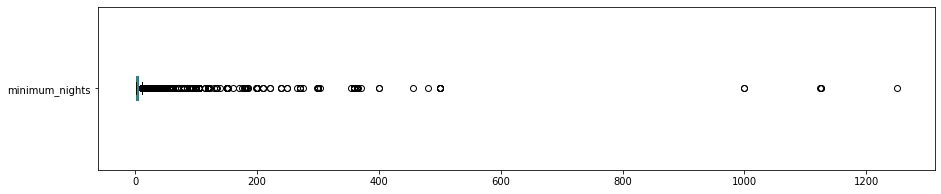

In [0]:
# Bloxplot "Minimum_nights":
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show

# Ver quantidade de entradas cujo valores estão acima de 30:
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Na imagem acima concluímos que o número mínimo de diárias da maioria das entradas é de até 30, sendo que no resumo anterior vimos que a média dessa variável é de 22. As entradas que fogem dessa média representam menos de 2% do total.

# Histograma sem outliers
Agora que já conhecemos os valores distorcem os histogramas das variáveis "price" e "minimum_nights, vamos limpar o DataFrame delas e plotar novamente os histogramas: 

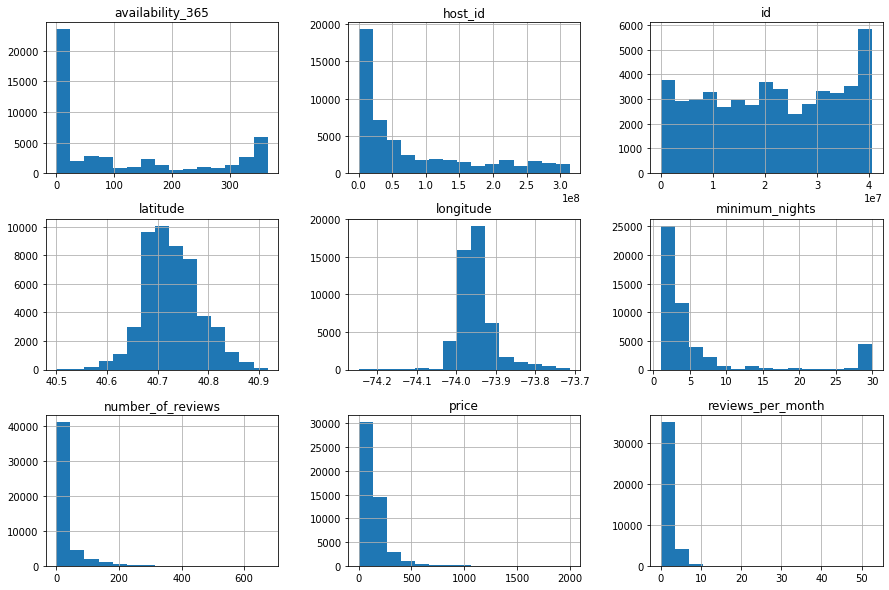

In [0]:
# Remover os outliers em um novo DataFrame:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Vamos remover 'calculated_host_listings_count' porque não é relevante para nossa análise:
df_clean.drop('calculated_host_listings_count', axis=1, inplace=True)

# Plotar o novo histograma:
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Sabemos que quase 100% dos imovéis tem uma diária que custa até USD2,000.00. 

Mas qual seria a média de preço de todas as entradas? Vejamos abaixo:

In [0]:
# Ver a média da coluna `price``
df['price'].describe()

df.price.mean()

158.17178205102869

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [0]:
# Matriz de correlação:
df_clean = df.copy()
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028446,-0.041875,-0.024541,0.024030,0.064602
minimum_nights,0.028446,1.000000,-0.087740,-0.126854,0.121796,0.149246
number_of_reviews,-0.041875,-0.087740,1.000000,0.558249,-0.075036,0.118058
reviews_per_month,-0.024541,-0.126854,0.558249,1.000000,-0.044535,0.177516
calculated_host_listings_count,0.024030,0.121796,-0.075036,-0.044535,1.000000,0.224928
availability_365,0.064602,0.149246,0.118058,0.177516,0.224928,1.000000


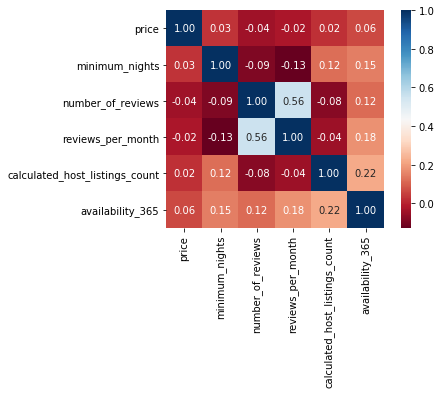

In [0]:
# Heatmap a partir da matriz de correlação:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**


Com o comando abaixo podemos ver que o tipo de imóvel com mais ofertas em NYC é "Entire home/apt", seguido pela opção "Private Room".

In [0]:
df.room_type.value_counts()

Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64

Vejamos em percentuais o quanto isso representa:

In [0]:
df.room_type.value_counts() / df_clean.shape[0]*100


Entire home/apt    51.663076
Private room       45.030534
Shared room         2.482262
Hotel room          0.824127
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Nova York?**
Através dos dados fornecidos, vamos descobrir qual o bairro mais caro para se hospedar em Nova York:



In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Manhattan Beach      1098.800000
Fort Wadsworth        800.000000
Woodrow               700.000000
Theater District      690.763754
Country Club          525.000000
Prince's Bay          506.666667
Sea Gate              491.666667
Tribeca               414.596939
SoHo                  369.238764
Battery Park City     360.972222
Name: price, dtype: float64

Manhattan Beach é o bairro mais caro para se hospedar em Nova York... talvez caiba avaliar a possibilidade se hospedar em outro bairro e se deslocar para conhecer Manhattan Beach (mas isso é conteúdo para outro projeto :)).

Vamos analisar qual a disposição geográfica de opções através de longitude e latitude das acomodações, oferecidos no pacote dos dados:
Obs.: note que na imagem abaixo se forma o mapa da cidade em função das opções. A região de Manhattan está lotada, já a região da Ilha de Staten não conta com tantas opções. 

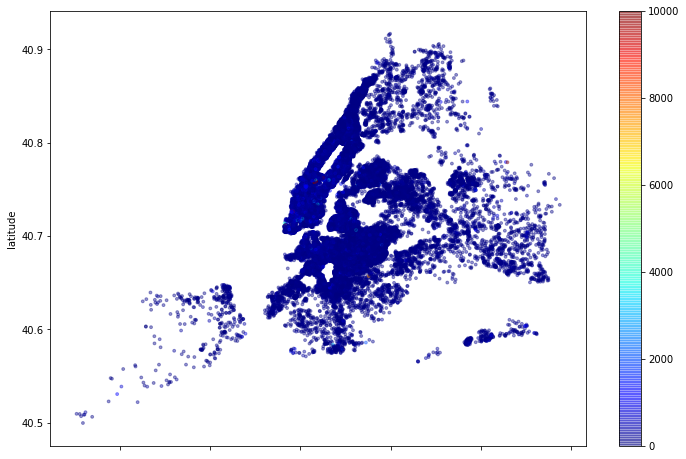

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O mínimo de noites na média das entradas é de 7.53 noites, também vale a pena considerar essa informação na hora de pensar em conhecer a cidade!

In [0]:
df_clean.minimum_nights.mean()

7.531907745212356

## Conclusões


Aos que pensam que essa tarefa seria apenas para fins de prática de exploração de dados brutos e análises "friamente calculadas", concluo que dá pra sair com uma boa ideia para início de planejamento de férias na "cidade que nunca dorme", hein?

O estudo proporcionou conhecer as localizações mais caras da cidade, bem como o mínimo de noites que as acomodações estabelecem. Pensou em se instalar em Manhattan Beach? Começou a análise exploratória e viu que a média de valor das acomodações em Sea Gate custam mais 2 vezes menos que os bairros ficam a (aproximadamente) 15 minutos de distância um do outro... vale a pena repensar!

No sentido técnico essa abordagem quebrou paradigmas estimulando a desconsideração de alguns dados (como os outliers, por exemplo). Quanto mais dados melhor? Sim, mas é preciso olhar com cautela os valores, caso contrário o objetivo da análise pode não ser atingido.

